In [407]:
import pandas as pd
import src.FuncionesDeLimpieza as fun
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
sharks = pd.read_csv('data/attacks.csv', encoding="ISO-8859-1")
display(sharks)
pd.isna(sharks).sum()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Case Number               17021
Date                      19421
Year                      19423
Type                      19425
Country                   19471
Area                      19876
Location                  19961
Activity                  19965
Name                      19631
Sex                       19986
Age                       22252
Injury                    19449
Fatal (Y/N)               19960
Time                      22775
Species                   22259
Investigator or Source    19438
pdf                       19421
href formula              19422
href                      19421
Case Number.1             19421
Case Number.2             19421
original order            19414
Unnamed: 22               25722
Unnamed: 23               25721
dtype: int64

In [14]:
sharks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

In [15]:
sharks.describe()

,Year,original order
count,6300.000000,6309.000000
mean,1927.272381,3155.999683
std,281.116308,1821.396206
min,0.000000,2.000000
25%,1942.000000,1579.000000
50%,1977.000000,3156.000000
75%,2005.000000,4733.000000
max,2018.000000,6310.000000


In [36]:
sharks['Case Number.1']==sharks['Case Number.2']

0         True
1         True
2         True
3         True
4         True
         ...  
25718    False
25719    False
25720    False
25721    False
25722    False
Length: 25723, dtype: bool

In [37]:
pd.isna(sharks['Case Number.1'])

0        False
1        False
2        False
3        False
4        False
         ...  
25718     True
25719     True
25720     True
25721     True
25722     True
Name: Case Number.1, Length: 25723, dtype: bool

In [42]:
sharks[sharks.isnull().any(axis=1)] 

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0
5,2018.06.03.b,03-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,"Flat Rock, Ballina",Kite surfing,Chris,M,...,N,NaN,NaN,"Daily Telegraph, 6/4/2018",2018.06.03.b-FlatRock.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.b,2018.06.03.b,6298.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
sharks.drop(["Unnamed: 22", "Unnamed: 23"], axis=1, inplace=True) #Buena decisión, dado que todos los valores en estas columnas exxcepto 1 eran Nan.

KeyError: "['Unnamed: 22' 'Unnamed: 23'] not found in axis"

In [8]:
sharks

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
sharks[sharks.isnull().any(axis=1)]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0
5,2018.06.03.b,03-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,"Flat Rock, Ballina",Kite surfing,Chris,M,...,N,NaN,NaN,"Daily Telegraph, 6/4/2018",2018.06.03.b-FlatRock.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.b,2018.06.03.b,6298.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
sharks.dropna(how="all", inplace=True)#Aquí borro todas las filas en las cuales todos los valores son Nans


In [11]:
sharks

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8698,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8699,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8700,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8701,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
sharks['Species']=sharks['Species ']

In [45]:
sharks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8703 entries, 0 to 25722
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null  

In [400]:
sharks.Type.value_counts()

Unprovoked      4595
Provoked         574
Invalid          547
Sea Disaster     239
Boating          203
Boat             137
Questionable       2
Boatomg            1
Name: Type, dtype: int64

In [401]:
sharks2= sharks.copy()

In [408]:

sharks2['Type2']= sharks2.Type.apply(fun.change)
sharks2.drop(['Type'], axis=1, inplace= True)


AttributeError: module 'src.FuncionesDeLimpieza' has no attribute 'change'

In [49]:
sharks2.Type2.value_counts()

Unprovoked      4595
Provoked         574
Invalid          547
Boating          341
Sea Disaster     239
Questionable       2
Name: Type2, dtype: int64

In [50]:


sharks2['RealCaseNumber']= sharks2['Case Number'].apply(fun.change2)

sharks2.drop(['Case Number'], axis=1, inplace= True)

In [51]:
sharks2

,Date,Year,Country,Area,Location,Activity,Name,Sex,Age,Injury,...,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Species,Type2,RealCaseNumber
0,25-Jun-2018,2018.0,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",...,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,White shark,Boating,2018.06.25
1,18-Jun-2018,2018.0,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,...,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,Unprovoked,2018.06.18
2,09-Jun-2018,2018.0,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,...,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,Invalid,2018.06.09
3,08-Jun-2018,2018.0,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,...,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,2 m shark,Unprovoked,2018.06.08
4,04-Jun-2018,2018.0,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,...,A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,"Tiger shark, 3m",Provoked,2018.06.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8698,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8699,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8701,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
sharks2.dropna(how="all", inplace=True)
sharks2

,Date,Year,Country,Area,Location,Activity,Name,Sex,Age,Injury,...,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Species,Type2,RealCaseNumber
0,25-Jun-2018,2018.0,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",...,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,White shark,Boating,2018.06.25
1,18-Jun-2018,2018.0,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,...,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,Unprovoked,2018.06.18
2,09-Jun-2018,2018.0,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,...,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,Invalid,2018.06.09
3,08-Jun-2018,2018.0,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,...,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,2 m shark,Unprovoked,2018.06.08
4,04-Jun-2018,2018.0,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,...,A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,"Tiger shark, 3m",Provoked,2018.06.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6305,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,6307.0,NaN,NaN,NaN
6306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,6308.0,NaN,NaN,NaN
6307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,6309.0,NaN,NaN,NaN
6308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,6310.0,NaN,NaN,NaN


In [53]:
sharks2.drop(['original order'], axis=1, inplace= True)

In [264]:
sharks2.dropna(how="all", inplace=True)

In [265]:
sharks2

,Date,Year,Country,Area,Location,Activity,Name,Sex,Age,Injury,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,Species,Type2,RealCaseNumber
0,25-Jun-2018,2018.0,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,White shark,Boating,2018.06.25
1,18-Jun-2018,2018.0,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,NaN,Unprovoked,2018.06.18
2,09-Jun-2018,2018.0,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,NaN,Invalid,2018.06.09
3,08-Jun-2018,2018.0,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,2 m shark,Unprovoked,2018.06.08
4,04-Jun-2018,2018.0,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,"Tiger shark, 3m",Provoked,2018.06.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6298,Before 1903,0.0,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,...,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,NaN,Unprovoked,ND.0004
6299,1900-1905,0.0,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,...,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,NaN,Unprovoked,ND.0003
6300,1883-1889,0.0,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,...,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,NaN,Unprovoked,ND.0002
6301,1845-1853,0.0,CEYLON (SRI LANKA),Eastern Province,"Below the English fort, Trincomalee",Swimming,male,M,15,"FATAL. ""Shark bit him in half, carrying away t...",...,NaN,S.W. Baker,ND-0001-Ceylon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0001,ND.0001,NaN,Unprovoked,ND.0001


Hasta aquí, lo que he conseguido es que son distintas técnicas y funciones, he conseguido limpiar bastante los datos, librándome de la mayoría de las filas con Nans, y de algunas columnas que tampoco tenían información. Cierto es que siguén quedando muchas columnas que no nos interesan o bien por la alta cantidad de Nans, lo poco limpios que están sus datos, o bien porque tienen información muy similar o idéntica a otras. De todos modos, dado que me podría pasar toda la vida limpiando estos datos, creo que lo mejor será que depués de haber hecho una limpieza general, que plantee mis hipótesis  y ya desde aquí voy limpiando los datos que necesite.


In [56]:
sharks2.Country.value_counts()

USA                       2229
AUSTRALIA                 1338
SOUTH AFRICA               579
PAPUA NEW GUINEA           134
NEW ZEALAND                128
                          ... 
MALDIVE ISLANDS              1
NICARAGUA                    1
NORTH SEA                    1
RED SEA / INDIAN OCEAN       1
CEYLON (SRI LANKA)           1
Name: Country, Length: 212, dtype: int64

In [266]:
sharks2.Country.isnull().sum()

51

Con este Count, vemos que la mayoría de los ataques ocurren entre USA, Australia y Sudáfrica, lo cual va a ser interesante, para hacer comparaciones. Además, vemos que la columna de country está relativamente limpia, dado que solo hay 51 Nans, lo cual hablando en terminos relativos son pocos. Pues de aquí va a partir mi primera hipótesis, que es que los ataques de tiburones en Australia son más mortales, dado que yo creo que por lo general ahí viven especies más agresivas.

In [268]:
Test= sharks2[(sharks2.Country== 'AUSTRALIA') |(sharks2.Country== 'SOUTH AFRICA') | (sharks2.Country== 'USA')]  

Test['Fatal']= Test['Fatal (Y/N)'].apply(fun.change3)
Test.head()
Test.drop(['Fatal (Y/N)'], axis=1, inplace=True)
Agrupado=Test.groupby(['Country','Fatal'])['Fatal'].count()
Agrupado

<ipython-input-268-28a62923a7d9>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/eduardo/anaconda3/envs/Ironhack/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Country       Fatal
AUSTRALIA     N         921
              Y         283
SOUTH AFRICA  N         407
              Y         106
USA           N        1837
              Y         186
Name: Fatal, dtype: int64

Ahora mi objetivo aquí será transformar los valores aporcentajes, para que se pueda hacer una buena comparación en términos relativos de dónde hay más muertes

In [97]:
Agrupor = Agrupado.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))
Agrupor= Agrupor.unstack()

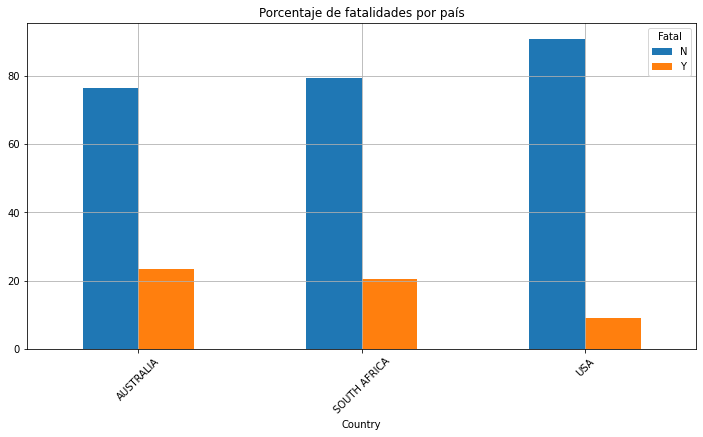

In [370]:
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'

Grafico1= Agrupor.plot(kind= 'bar',figsize=(12,6), title="Porcentaje de fatalidades por país")
plt.xticks(rotation=45)
plt.grid()
Grafico1.figure.savefig("Figuras/grafico1.png", dpi=1000)

In [63]:
Usa= sharks2[sharks2.Country=='USA']
Australia= sharks2[sharks2.Country=='AUSTRALIA']
Sudaf= sharks2[sharks2.Country== 'SOUTH AFRICA'] #Ahora voy a coger las columnass que yo considere más importantes. Como en tantos otros casos, Sex estaba escrito con un espacio detrás.
usa = Usa[['Country','Date', 'Year', 'Type2', 'Activity', 'Area', 'Fatal (Y/N)', 'Sex ','Species']]
australia = Australia[['Country','Date', 'Year', 'Type2', 'Activity', 'Area', 'Fatal (Y/N)', 'Sex ','Species']]
sudaf = Sudaf[['Country','Date', 'Year', 'Type2', 'Activity', 'Area', 'Fatal (Y/N)', 'Sex ','Species']]

In [139]:
usa2 = usa.dropna(subset=["Species"]) 
usa2.Year.value_counts()
#Aquí quito todas las filas que tengan Nan en specie

2015.0    56
2007.0    48
2012.0    42
2014.0    41
2003.0    39
          ..
1903.0     1
1904.0     1
1905.0     1
1949.0     1
1890.0     1
Name: Year, Length: 131, dtype: int64

In [130]:
usa2.sample(10)

,Country,Date,Year,Type2,Activity,Area,Fatal (Y/N),Sex,Species
2117,USA,04-Jul-1999,1999.0,Unprovoked,Wading in school of baitfish,Florida,N,F,"Blacktip shark, 1.8 m [6']"
984,USA,27-Sep-2010,2010.0,Unprovoked,Surfing,Oregon,N,M,White shark
3732,USA,12-Nov-1963,1963.0,Provoked,Testing anti-shark cage,Florida,N,M,"Silky shark, 1.9 m [6.5']"
2003,USA,29-Sep-2000,2000.0,Unprovoked,Sitting on surfboard,California,N,M,"White shark, 4.3 m [14']"
1485,USA,Reported 23-Apr-2006,2006.0,Invalid,NaN,Florida,NaN,M,Invalid
2777,USA,13-Jun-1987,1987.0,Provoked,Fishing,Florida,N,M,1.5 m [5'] blacktip shark
1418,USA,11-Nov-2006,2006.0,Unprovoked,Swimming,Hawaii,N,M,2 m to 3 m shark
1551,USA,05-Sep-2005,2005.0,Unprovoked,Wading,North Carolina,N,F,Bull shark
2113,USA,26-Jul-1999,1999.0,Unprovoked,Swimming with dolphins,Florida,N,M,"Bull shark, 2.1 m [7']"
4861,USA,30-Dec-1936,1936.0,Unprovoked,"Diving, attempting to retrieve body of drownin...",Hawaii,N,M,6 m [20'] shark


Vemos que dónde se encuentran la mayoría de los problemas es en la columna de especies, dado que sigue habiendo muchos Nans, y además no están nada agrupadas. Además los datos son muy difíciles de unificar debido a que en muchos casos no se especifica el tipo de tiburón.

In [322]:
usawhite= usa2[usa2.Species.str.contains('white shark', case=False)]
#Haciedno esto nos quedamos solo con los ataques de tiburón blanco.

uw = usawhite.set_index('Year')

uw['Species']= uw['Species'].apply(fun.cambio1)
uw.head()

,Country,Date,Type2,Activity,Area,Fatal (Y/N),Sex,Species
Year,,,,,,,,
2018.0,USA,25-Jun-2018,Boating,Paddling,California,N,F,White shark
2017.0,USA,24-Nov-2017,Unprovoked,Spearfishing,California,N,M,White shark
2017.0,USA,23-Aug-2017,Unprovoked,SUP,Massachusetts,N,M,White shark
2017.0,USA,01-Aug-2017,Boating,Kayaking / Fishing,California,N,M,White shark
2017.0,USA,20-Jul-2017,Boating,Kayaking,California,N,M,White shark


In [320]:
usabull=usa2[usa2.Species.str.contains('bull shark', case=False)]
ub = usabull.set_index('Year')

ub['Species']= ub['Species'].apply(fun.cambio2)

In [321]:
usatiger= usa2[usa2.Species.str.contains('tiger', case=False)]
ut= usatiger.set_index('Year')

ut['Species']= ut['Species'].apply(fun.cambio3)

Visto esto, mi segunda hipótesis va a ser que los ataques de tiburón blanco han subido menos con los años qque los de tiburón tigre o tiburón toro.

In [228]:
UsaSpe = pd.concat([uw,ub,ut])
UsaSpe.tail()

,Country,Date,Type2,Activity,Area,Fatal (Y/N),Sex,Species
Year,,,,,,,,
1933.0,USA,10-Apr-1933,Unprovoked,Swimming,Florida,Y,M,Tiger shark
1931.0,USA,13-Jun-1931,Provoked,Gaffing & attempting to bring onboard a harpoo...,Hawaii,N,M,Tiger shark
1930.0,USA,11-Jul-1930,Unprovoked,Swimming,Florida,N,M,Tiger shark
1879.0,USA,1879,Unprovoked,Floating with life buoy after pilot launch cap...,Mississippi,Y,M,Tiger shark
1853.0,USA,Reported 13-Jul-1853,Unprovoked,Swimming,South Carolina,Y,M,Tiger shark


In [233]:
UsaSpe2= UsaSpe.reset_index()

Tras intentar varias cosas, aquí ya tengo los ataques de Tiburón de estados unidos solo para los que han sido de tiburón tigre, blanco o toro. La verdad es que podría haber hecho exactamente lo mismo sin separarlo por países.

In [234]:

UsaSpe2.Year= UsaSpe2.Year.apply(fun.cambio4)
UsaSpe2.head()


,Year,Country,Date,Type2,Activity,Area,Fatal (Y/N),Sex,Species
0,2018.0,USA,25-Jun-2018,Boating,Paddling,California,N,F,White shark
1,2017.0,USA,24-Nov-2017,Unprovoked,Spearfishing,California,N,M,White shark
2,2017.0,USA,23-Aug-2017,Unprovoked,SUP,Massachusetts,N,M,White shark
3,2017.0,USA,01-Aug-2017,Boating,Kayaking / Fishing,California,N,M,White shark
4,2017.0,USA,20-Jul-2017,Boating,Kayaking,California,N,M,White shark


In [235]:
UsaSpe2.groupby(UsaSpe2['Year']).agg({'Species':'sum'})

,Species
Year,
1853.0,White sharkWhite sharkTiger shark
1879.0,Tiger shark
1898.0,White shark
1915.0,White shark
1916.0,White sharkWhite shark
...,...
2014.0,White sharkWhite sharkWhite sharkWhite sharkWh...
2015.0,White sharkWhite sharkWhite sharkWhite sharkWh...
2016.0,White sharkWhite sharkWhite sharkWhite sharkBu...


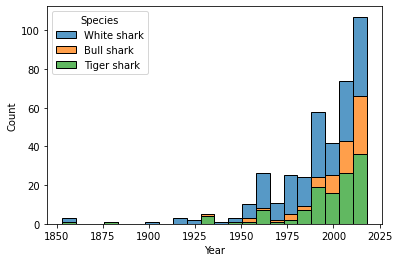

In [371]:
Grafico2=sns.histplot(data= UsaSpe2, x= 'Year', hue= 'Species', multiple='stack')
Grafico2.figure.savefig("Figuras/grafico2.png", dpi=1000)

<AxesSubplot:xlabel='Year', ylabel='Count'>

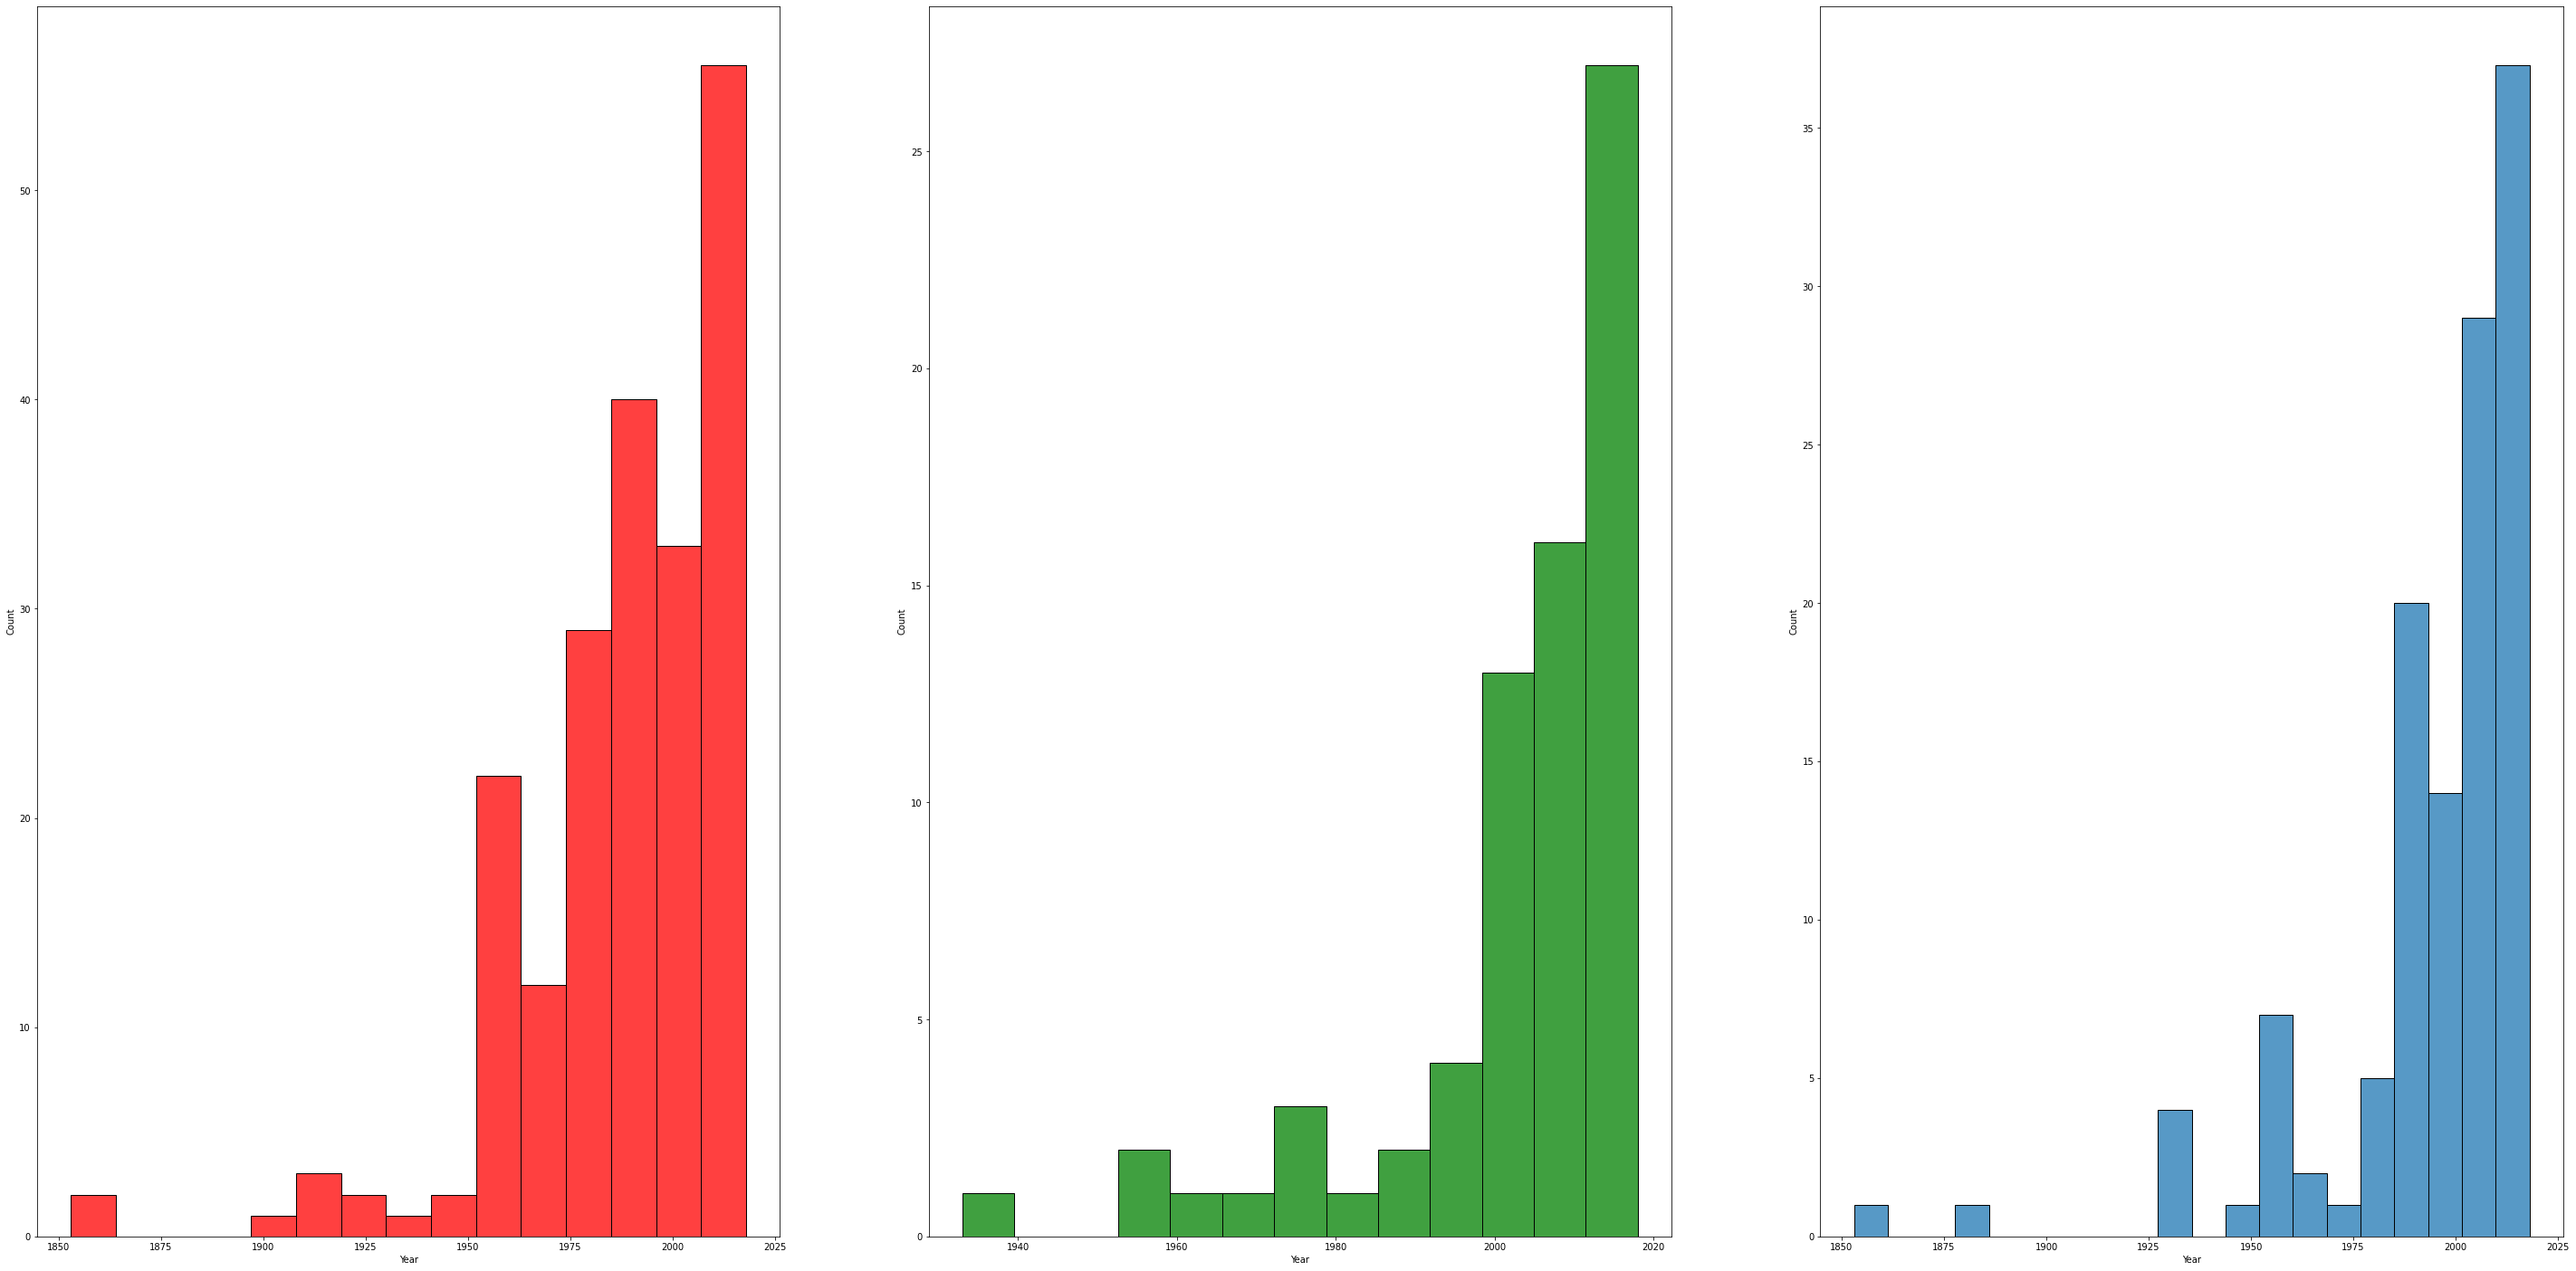

In [393]:
Uw= uw.reset_index()
Ub= ub.reset_index()
Ut= ut.reset_index()
Uw['Year']= Uw['Year'].apply(cambio4)

Grafico3= fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(50,25))
sns.histplot(data=Uw, x="Year", ax=axs[0], color= 'red')
sns.histplot(data=Ub, x="Year", ax=axs[1], color='green')
sns.histplot(data=Ut, x="Year", ax=axs[2])



AttributeError: 'tuple' object has no attribute 'plot'

Mi siguiente hipótesis es que porcentualmente en sudáfica es dónde más ataques de tiburón blanco hay, y que además los de esta especie son los más letales.

In [273]:
Test2= Test[['Year', 'Country', 'Species', 'Sex ', 'Date', 'Fatal']]

In [287]:
Test2.head()

,Year,Country,Species,Sex,Date,Fatal
0,2018.0,USA,White shark,F,25-Jun-2018,N
1,2018.0,USA,NaN,F,18-Jun-2018,N
2,2018.0,USA,NaN,M,09-Jun-2018,N
3,2018.0,AUSTRALIA,2 m shark,M,08-Jun-2018,N
5,2018.0,AUSTRALIA,NaN,M,03-Jun-2018,N


In [326]:

Test2 = Test2.dropna(subset=["Species"]) 
Test2W=Test2[Test2.Species.str.contains('white shark', case=False)]
Test2B= Test2[Test2.Species.str.contains('bull shark', case=False)]
Test2T= Test2[Test2.Species.str.contains('tiger shark', case=False)]
Test2W['Species']= Test2W['Species'].apply(fun.cambio1)
Test2B['Species']= Test2B['Species'].apply(fun.cambio2)
Test2T['Species']= Test2T['Species'].apply(fun.cambio3)

<ipython-input-326-0ac422f40b0d>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-326-0ac422f40b0d>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-326-0ac422f40b0d>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [327]:
Test3 = pd.concat([Test2W,Test2B,Test2T])
Test3.sample(20)

,Year,Country,Species,Sex,Date,Fatal
826,2012.0,USA,White shark,M,13-Jan-2012,N
2797,1986.0,USA,White shark,M,06-Dec-1986,N
1096,2009.0,SOUTH AFRICA,White shark,M,29-Aug-2009,Y
2607,1991.0,SOUTH AFRICA,White shark,M,12-Feb-1991,N
3360,1971.0,USA,White shark,M,19-Jul-1971,N
118,2017.0,USA,White shark,M,14-Jul-2017,N
4918,1935.0,AUSTRALIA,White shark,M,09-Mar-1935,Y
3058,1980.0,USA,Tiger shark,M,04-Aug-1980,N
3656,1964.0,AUSTRALIA,White shark,M,13-Nov-1964,N
1699,2004.0,AUSTRALIA,White shark,M,25-Jan-2004,N


In [386]:
AgrupadoT=Test3.groupby(['Country', 'Species'])['Species'].count().unstack()
AgrupadoT


Species,Bull shark,Tiger shark,White shark
Country,,,
AUSTRALIA,30,56,151
SOUTH AFRICA,3,12,165
USA,71,122,203


In [348]:
AgrupadoP= AgrupadoT.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum())).unstack()
AgrupadoP

Species,Bull shark,Tiger shark,White shark
Country,,,
AUSTRALIA,12.658228,23.628692,63.713080
SOUTH AFRICA,1.666667,6.666667,91.666667
USA,17.929293,30.808081,51.262626


Vemos como efectivamente se ha demostrado la hipótesis de que en Sudáfrica, iba a se el país dónde porcentualmente más ataques de tiburones blancos había, dado que es una zona dónde se conoce que hay muchos.

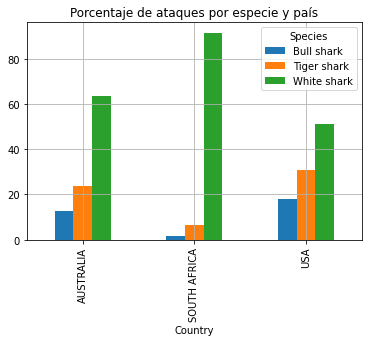

In [394]:
Grafico4= AgrupadoP.plot(kind='bar', title="Porcentaje de ataques por especie y país")
plt.grid()
Grafico4.figure.savefig("Figuras/grafico4.png", dpi=1000)

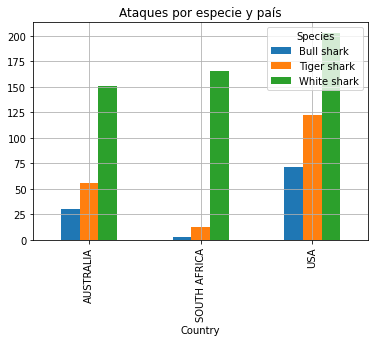

In [395]:
Grafico5= AgrupadoT.plot(kind='bar', title="Ataques por especie y país")
plt.grid()
Grafico5.figure.savefig("Figuras/grafico5.png", dpi=1000)

In [390]:
AgrupadoU= Test3.groupby(['Species','Fatal'])['Fatal'].count().unstack()
AgrupadoU

Fatal,N,Y
Species,,
Bull shark,84,19
Tiger shark,153,34
White shark,412,102


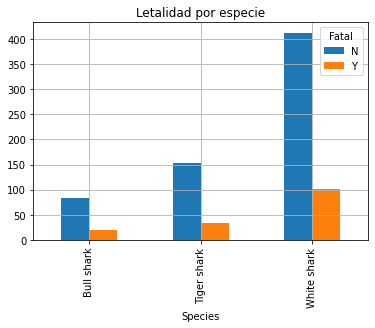

In [396]:
Grafico6=AgrupadoU.plot(kind='bar',title="Letalidad por especie")
plt.grid()
Grafico6.figure.savefig("Figuras/grafico6.png", dpi=1000)

In [363]:
AgrupadoU2=AgrupadoU.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum())).unstack()

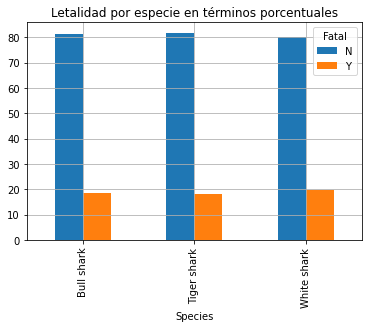

In [397]:
Grafico7=AgrupadoU2.plot(kind='bar', title="Letalidad por especie en términos porcentuales")
plt.grid()
Grafico7.figure.savefig("Figuras/grafico7.png", dpi=1000)

Aquí en cambio, vemos cómo en términos porcentuales, todos los tiburones tienen una similitud de letalidad.